--- Data Preprocessing ---
Shape of scaled training features (X_train_scaled): (120, 4)
Shape of one-hot encoded training labels (y_train_one_hot): (120, 3)
------------------------------ 



C:\Users\Nitesh Varman\Downloads\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Model Architecture ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

------------------------------ 

--- Training the Model ---
✅ Model training complete!

Final Training Accuracy: 95.83%
Final Testing Accuracy: 90.00%
------------------------------ 

--- Model Evaluation ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


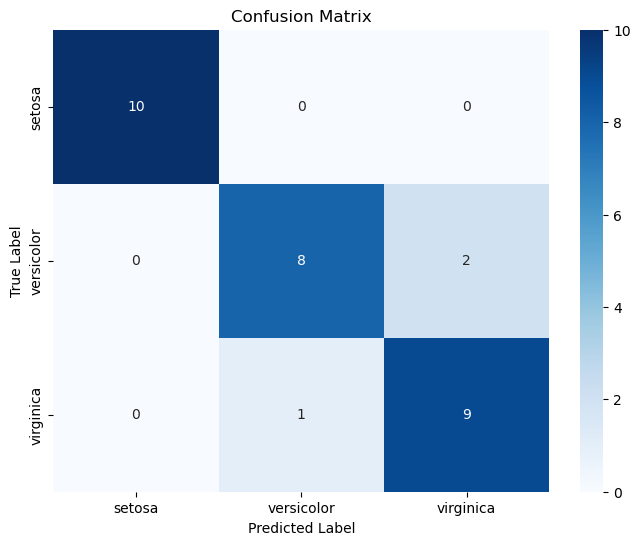


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



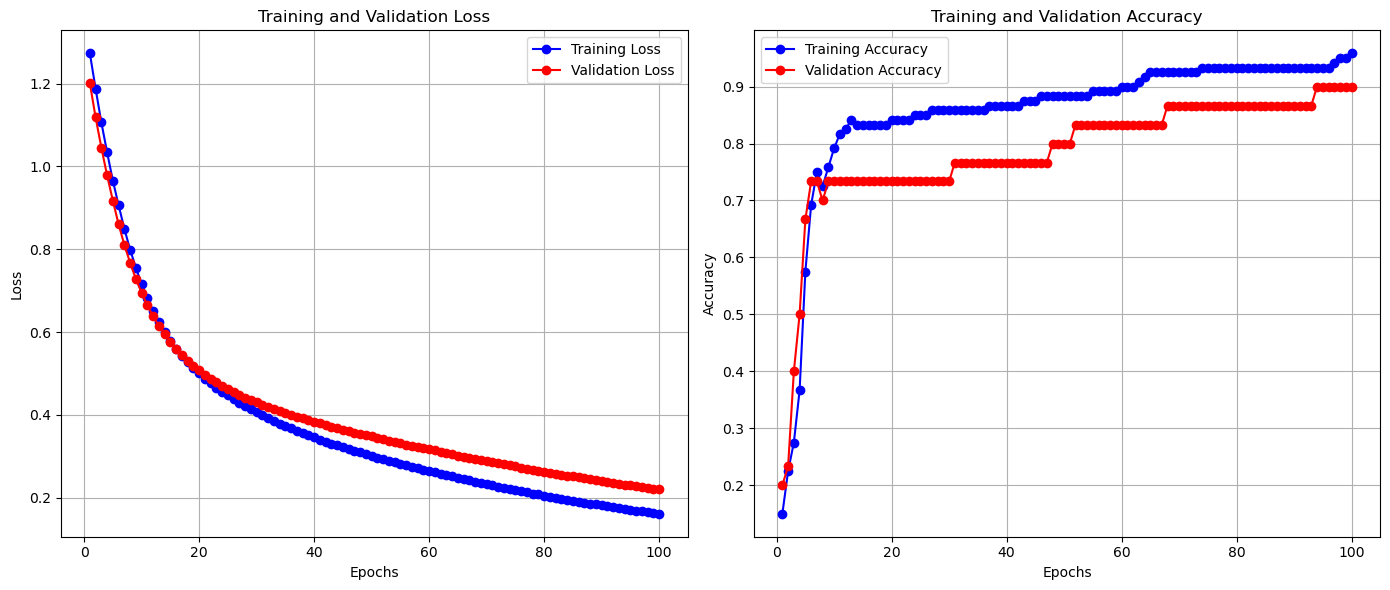

In [1]:
# 1. IMPORTING NECESSARY LIBRARIES
# ----------------------------------
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report


# 2. LOADING AND PREPROCESSING THE DATA
# ---------------------------------------
# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the data into training (80%) and testing (20%) sets
# stratify=y ensures the proportion of classes is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features using StandardScaler
# It's important to fit the scaler on the training data only and then transform both sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable for categorical_crossentropy loss function
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

print("--- Data Preprocessing ---")
print("Shape of scaled training features (X_train_scaled):", X_train_scaled.shape)
print("Shape of one-hot encoded training labels (y_train_one_hot):", y_train_one_hot.shape)
print("-" * 30, "\n")


# 3. DESIGNING THE MLP MODEL
# ----------------------------
# Build the MLP model using Keras Sequential API
model = Sequential()

# Input layer (4 features) and one hidden layer (10 neurons) with ReLU activation
model.add(Dense(10, input_shape=(4,), activation='relu'))

# Output layer (3 classes) with softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
# Adam is an efficient optimizer
# categorical_crossentropy is the standard loss function for multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
print("--- Model Architecture ---")
model.summary()
print("-" * 30, "\n")


# 4. TRAINING THE MODEL
# -----------------------
print("--- Training the Model ---")
# Train the model for 100 epochs
# validation_data allows us to monitor performance on the test set during training
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test_scaled, y_test_one_hot),
                    verbose=0) # Set verbose=0 to keep the output clean

print("✅ Model training complete!")

# Report final accuracy on training and testing sets
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_one_hot, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_one_hot, verbose=0)

print(f"\nFinal Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Testing Accuracy: {test_acc*100:.2f}%")
print("-" * 30, "\n")


# 5. EVALUATING THE MODEL
# -------------------------
print("--- Model Evaluation ---")
# Get predictions on the test set
# model.predict returns probabilities, so we use np.argmax to get the class index
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# a) Plot the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# b) Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

# c) Visualize training loss and accuracy over epochs
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()